

# Power lifting (load and EDA )



 ## Import Dataset

In [1]:
# from kaggle with Token
from google.colab import files
uploaded =files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d waqi786/powerlifting-data
!unzip powerlifting-data.zip


Saving power_lifting.ipynb to power_lifting.ipynb
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/waqi786/powerlifting-data
License(s): apache-2.0
  0% 0.00/17.1k [00:00<?, ?B/s]
100% 17.1k/17.1k [00:00<00:00, 20.1MB/s]
Archive:  powerlifting-data.zip
  inflating: powerlifting_dataset.csv  


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:
df=pd.read_csv('powerlifting_dataset.csv')
df.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [4]:
 # The dataset contains 3000 rows and 5 columns
df.shape

(3000, 5)

In [5]:
# Display the last 5 rows of the dataset
df.tail()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [6]:
# Display 5 random samples from the dataset
df.sample(5)

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
195,Daniel Lee,60,120 kg,Deadlift,130
1760,Chris Brown,59,52 kg,Bench Press,136
675,John Doe,21,59 kg,Deadlift,116
1041,Jessica Wilson,26,105 kg,Squat,118
1085,Chris Brown,42,83 kg,Deadlift,251


In [7]:
#information about dtype,null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [8]:
# Summary statistics for numerical columns
df.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [9]:
# Display all column names in the dataset
df.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

In [10]:
# Select and display names of numerical columns
numerical_cols =df.select_dtypes(include='number').columns
numerical_cols

Index(['Age', 'Amount Lifted (kg)'], dtype='object')

In [11]:
# Select and display names of categorical columns
cat_cols=df.select_dtypes(exclude='number').columns   # use exclude
cat_cols

Index(['Lifter Name', 'Weight Class', 'Lift Type'], dtype='object')

In [12]:
# Correlation between numerical features
df[numerical_cols].corr()

,Age,Amount Lifted (kg)
Age,1.000000,-0.013701
Amount Lifted (kg),-0.013701,1.000000


In [13]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()

1

## check duplicate

In [14]:
# Remove duplicate
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

## Null handling

In [16]:
#Check nulls
df.isnull().sum()

,0
Lifter Name,0
Age,0
Weight Class,0
Lift Type,0
Amount Lifted (kg),0


In [17]:
df.to_csv('powerlifting_dataset.csv',index=False)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         2999 non-null   object
 1   Age                 2999 non-null   int64 
 2   Weight Class        2999 non-null   object
 3   Lift Type           2999 non-null   object
 4   Amount Lifted (kg)  2999 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 140.6+ KB


In [24]:
# Count the number of cells with the value 'Open'
df['Weight Class'].str.contains('Open').sum()

356

In [28]:
# Remove the 'kg' unit from the 'Weight Class' column values
df['Weight Class'] = df['Weight Class'].str.replace(' kg', '', regex=False)


In [33]:
# Convert the 'Weight Class' column to numeric values and filling NaNs with the median value
df['Weight Class'] = pd.to_numeric(df['Weight Class'], errors='coerce').fillna(df['Weight Class'].median())


In [34]:
# Display the 'Weight Class' column after replacing 'Open' values with the median
print(df['Weight Class'])


0        59.0
1        83.0
2       105.0
3        66.0
4        74.0
        ...  
2995     74.0
2996     83.0
2997     83.0
2998     93.0
2999     83.0
Name: Weight Class, Length: 2999, dtype: float64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lifter Name         2999 non-null   object 
 1   Age                 2999 non-null   int64  
 2   Weight Class        2999 non-null   float64
 3   Lift Type           2999 non-null   object 
 4   Amount Lifted (kg)  2999 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 140.6+ KB


In [36]:
# numerical columns after converting the 'Weight Class' column to numeric
numerical_cols =df.select_dtypes(include='number').columns
numerical_cols

Index(['Age', 'Weight Class', 'Amount Lifted (kg)'], dtype='object')

In [37]:
#  categorical columns after converting 'Weight Class' to numeric using exclude='number'
cat_cols=df.select_dtypes(exclude='number').columns   # use exclude
cat_cols

Index(['Lifter Name', 'Lift Type'], dtype='object')

In [38]:
# Recalculat the correlation matrix for numerical columns after converting 'Weight Class' to numeric
df[numerical_cols].corr()

,Age,Weight Class,Amount Lifted (kg)
Age,1.000000,0.006156,-0.014435
Weight Class,0.006156,1.000000,0.011250
Amount Lifted (kg),-0.014435,0.011250,1.000000


## Skewness handling

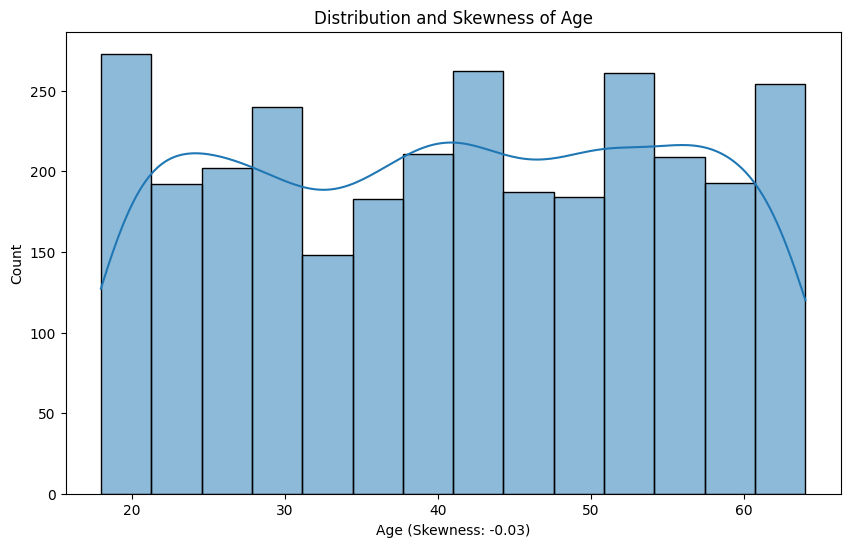

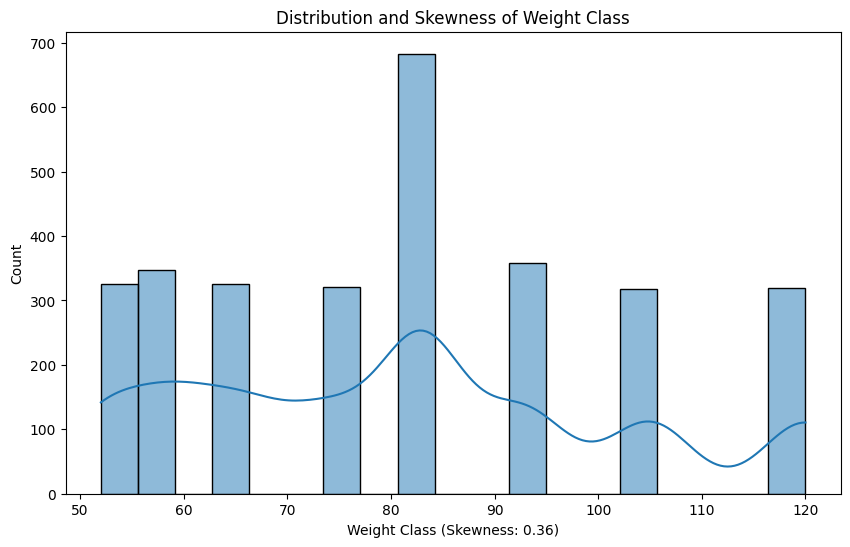

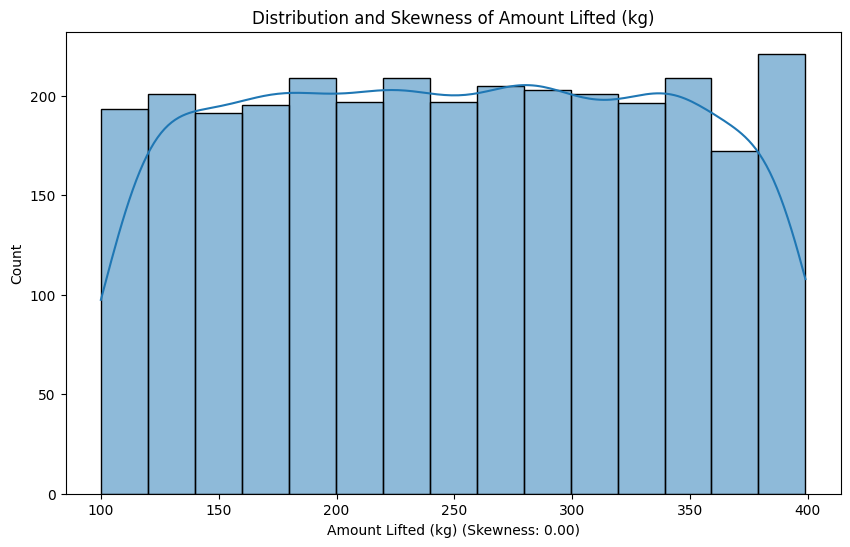

In [39]:
# skewness for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution and Skewness of {col}')
    skewness = df[col].skew()
    plt.xlabel(f'{col} (Skewness: {skewness:.2f})')
    plt.show()